# Table of Contents

# 01. Importing Libraries

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

# 02. Importing Data

In [4]:
# Create path
path = r"C:\Users\erj03\OneDrive\Documents\Achievement 6"

In [22]:
# Import data
df = pd.read_csv(os.path.join(path, 'insurance_clean.csv'), index_col = False)

In [23]:
# View dataframe
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [27]:
# Check shape of dataframe
df.shape

(1337, 7)

# 03. Data Prep

In [28]:
# Drop non-numerical columns
df_numeric = df[['age', 'bmi', 'children', 'charges']]

In [29]:
# View new dataframe
df_numeric.head()

age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

In [30]:
# Check descriptive statistics of columns
df.describe()

age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

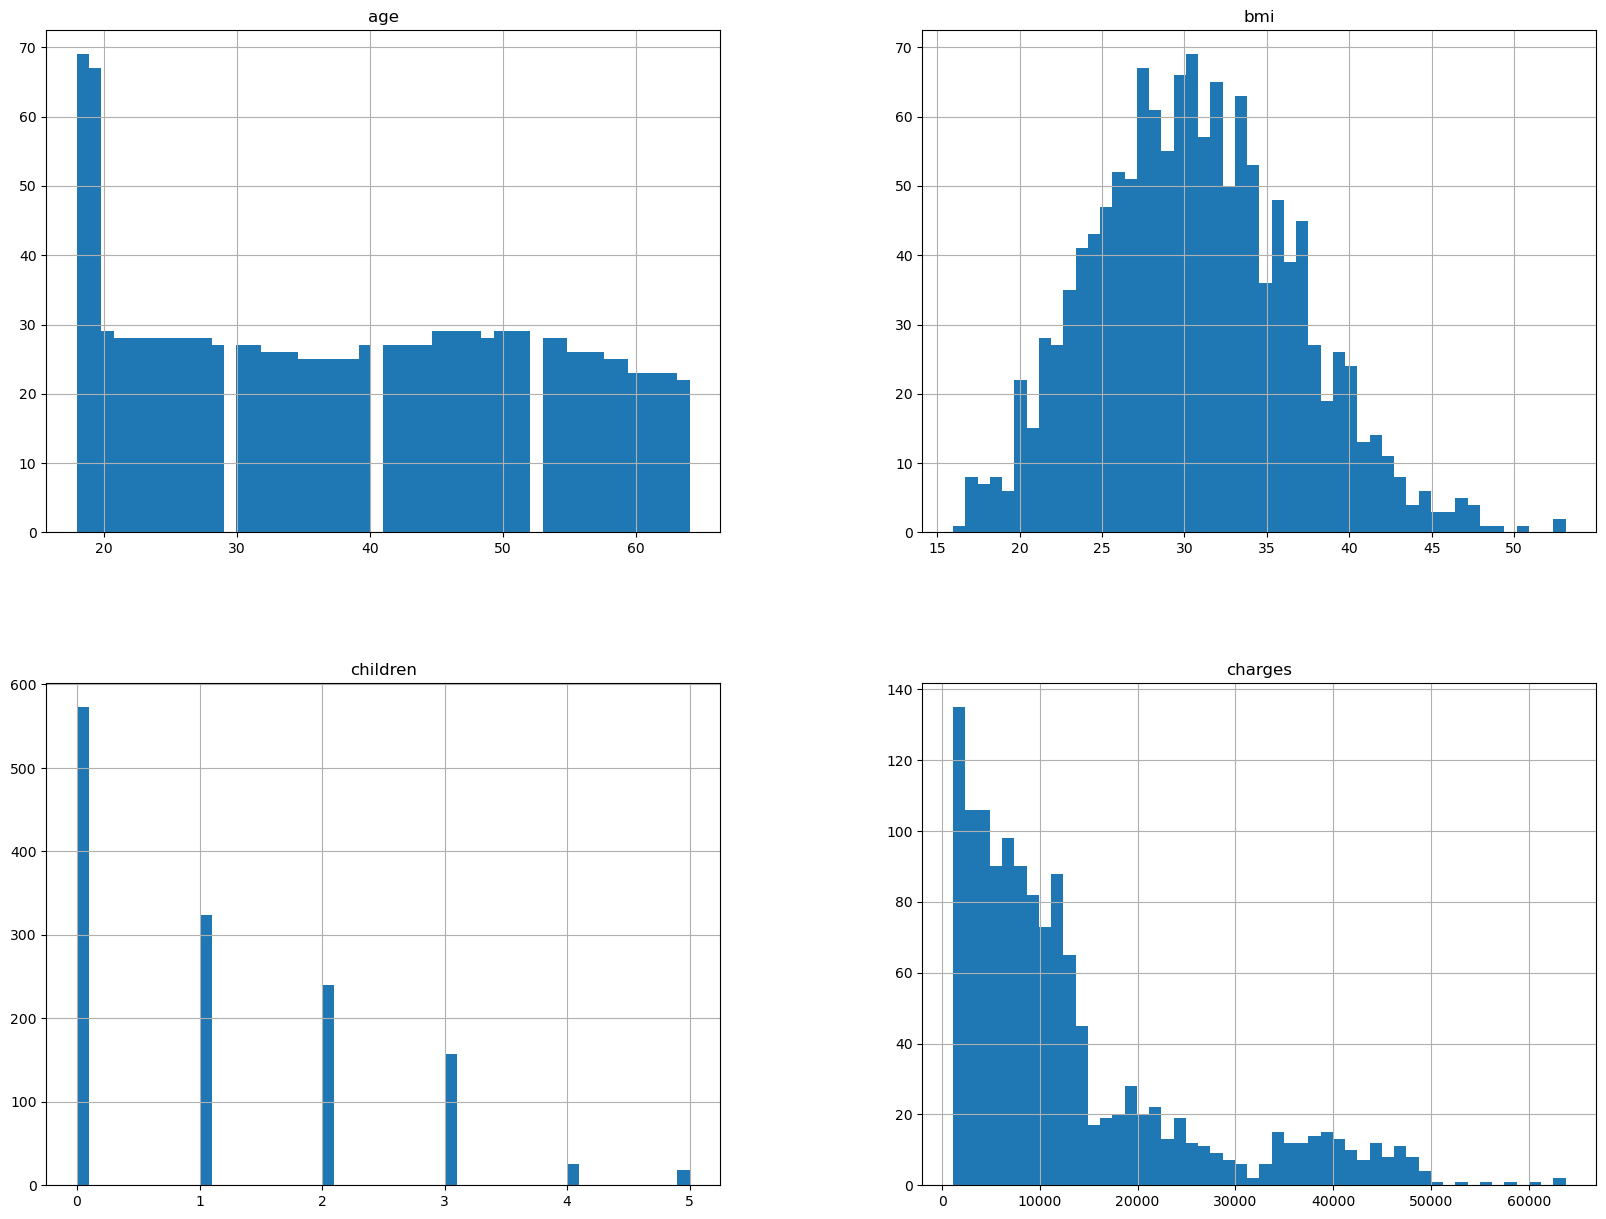

In [31]:
# Visualize data
df_numeric.hist(bins=50, figsize=(20, 15))
plt.show()

In [34]:
# Standardize data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

In [36]:
# Check standardization
print(df_standardized)

[[-1.44041773 -0.45315959 -0.90923416  0.2978567 ]
 [-1.51164747  0.50942165 -0.07944162 -0.9543806 ]
 [-0.79935006  0.3831546   1.58014347 -0.72937251]
 ...
 [-1.51164747  1.01448983 -0.90923416 -0.96228744]
 [-1.29795825 -0.79752426 -0.90923416 -0.9310536 ]
 [ 1.55123139 -0.26129928 -0.90923416  1.31029752]]


# 04. Elbow Technique

In [37]:
# Define range for number of clusters
num_cl = range(1, 10)

In [38]:
# Define k-means clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [41]:
# Create scores for each cluster option
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

In [43]:
# View scores
score

[-195939158682.99286,
 -47969960260.4719,
 -22948546893.92894,
 -12118189115.397703,
 -8533635974.455468,
 -6164408565.818455,
 -4432406493.133601,
 -3494004313.2096434,
 -2783342337.9617615]

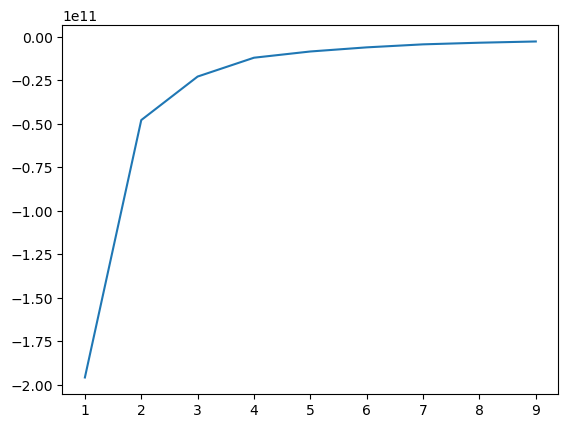

In [44]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.show()

Based on the elbow curve above, the number of clusters that works best for this data set is 4 because this is where we see the data level-off.

# 05. K-means Clustering

In [65]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [66]:
# Fit the k-means object to the data
kmeans.fit(df_numeric)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

In [67]:
# Add column for cluster assignment
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\erj03\AppData\Local\Temp\ipykernel_25144\389436807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['clusters'] = kmeans.fit_predict(df_numeric)


In [68]:
# View updated dataframe
df_numeric.head()

age     bmi  children      charges  clusters
0   19  27.900         0  16884.92400         3
1   18  33.770         1   1725.55230         1
2   28  33.000         3   4449.46200         1
3   33  22.705         0  21984.47061         0
4   32  28.880         0   3866.85520         1

In [69]:
# Check value counts for clusters column
df_numeric['clusters'].value_counts()

clusters
1    563
3    443
0    176
2    155
Name: count, dtype: int64

## Age vs Charges (4 Clusters)

Text(0.5, 1.0, 'Age vs Medical Costs')

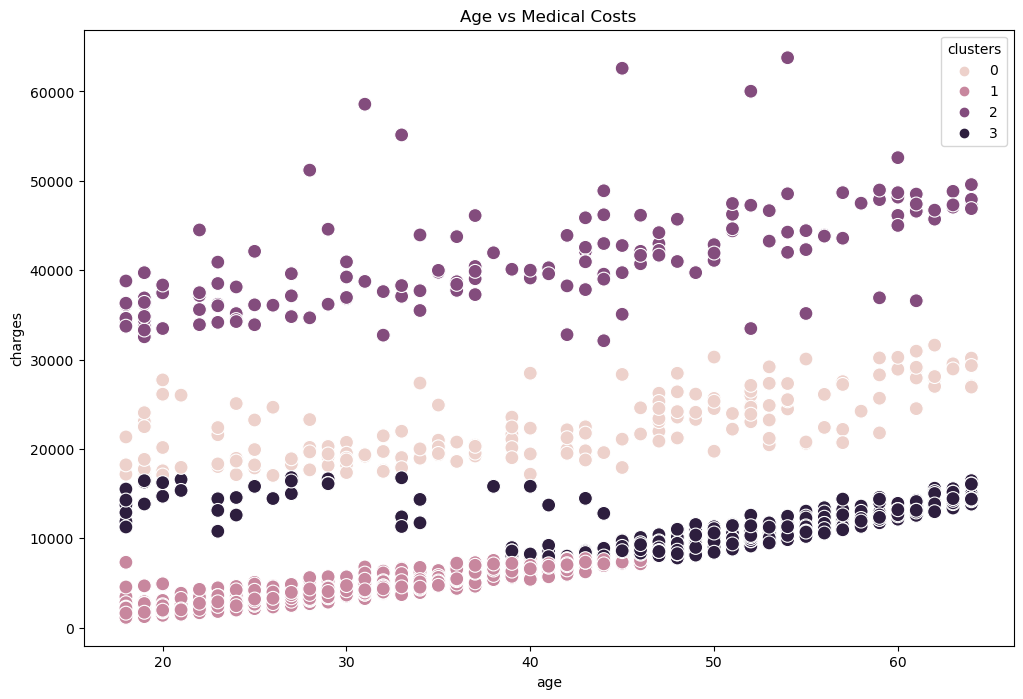

In [54]:
# Plot clusters for age and charges columns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_numeric, x='age', y='charges', hue='clusters', s=100)
plt.title('Age vs Medical Costs')

The clusters are show the same kind of groupings as noted in previous analyses. I think it would be interesting to look at this chart with only 3 clusters because I noted 3 distinct groups in past exercises.

## Age vs Charges (3 Clusters)

In [58]:
# Create the k-means object
kmeans2 = KMeans(n_clusters = 3)

In [60]:
# Fit the k-means object to the data
kmeans2.fit(df_numeric)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [61]:
# Add column for cluster assignment
df_numeric['clusters'] = kmeans2.fit_predict(df_numeric)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\erj03\AppData\Local\Temp\ipykernel_25144\3241303054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['clusters'] = kmeans2.fit_predict(df_numeric)


In [62]:
# View updated dataframe
df_numeric.head()

age     bmi  children      charges  clusters
0   19  27.900         0  16884.92400         2
1   18  33.770         1   1725.55230         0
2   28  33.000         3   4449.46200         0
3   33  22.705         0  21984.47061         2
4   32  28.880         0   3866.85520         0

In [63]:
# Check value counts for clusters column
df_numeric['clusters'].value_counts()

clusters
0    855
2    319
1    163
Name: count, dtype: int64

Text(0.5, 1.0, 'Age vs Medical Costs')

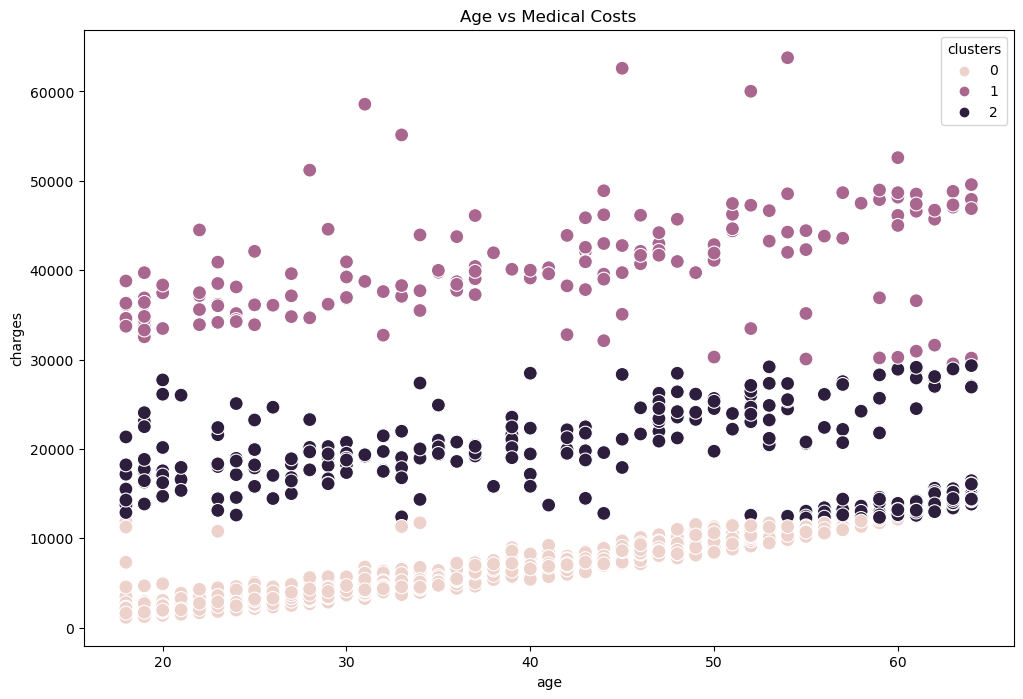

In [64]:
# Plot clusters for age and charges columns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_numeric, x='age', y='charges', hue='clusters', s=100)
plt.title('Age vs Medical Costs')

This is more what I was expecting for the cluster plot. Besides the tale end of cluster 0, you can see the 3 distinct groups that I noted in the previous analyses. 

## BMI vs Charges (4 Clusters)

Text(0.5, 1.0, 'BMI vs Medical Costs')

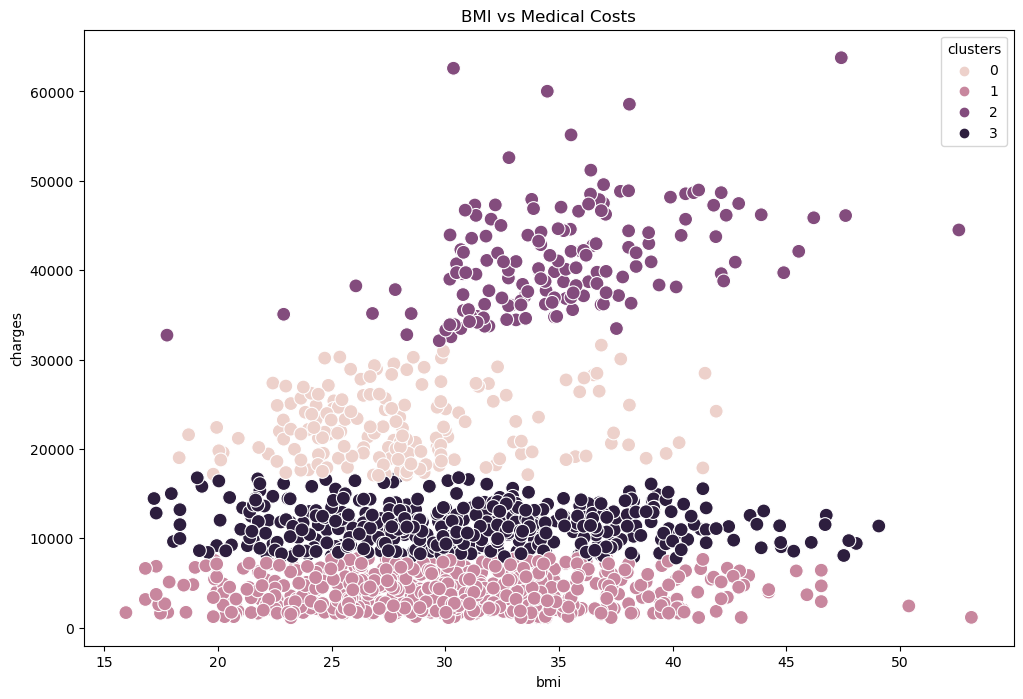

In [55]:
# Plot clusters for bmi and charges columns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_numeric, x='bmi', y='charges', hue='clusters', s=100)
plt.title('BMI vs Medical Costs')

The most signficant observation made from this cluster is that the cluster with the highest charges tends toward a larger BMI. Otherwise I don't think they other clusters tell us much and they are mostly putting the data into groups based on charges.

## Age vs Number of Children (4 Clusters)

Text(0.5, 1.0, 'Children vs Medical Costs')

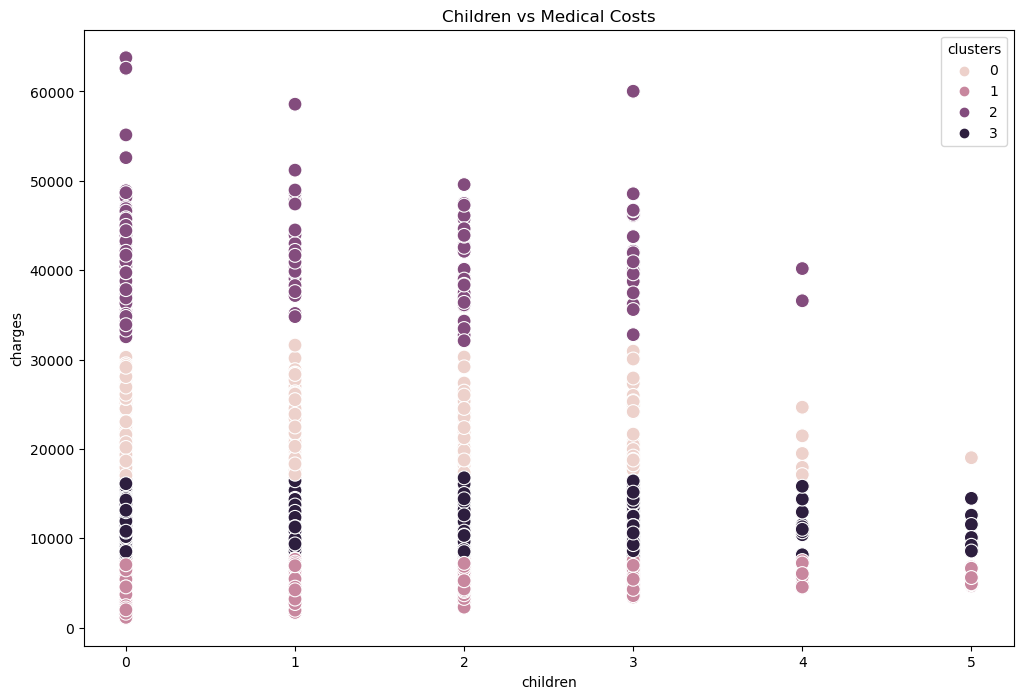

In [56]:
# Plot clusters for children and charges columns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_numeric, x='children', y='charges', hue='clusters', s=100)
plt.title('Children vs Medical Costs')

The clusters here don't really give any significant insight. This is not surprising as the correlation between number of children and charges was almost zero.

# 06. 4 Clusters Descriptive Statistics

In [80]:
# Use groupby to calculate descriptive statistics of clusters for charges column
df_numeric.groupby('clusters').agg({'charges':['mean', 'median', 'std', 'count']})                        

charges                                 
                  mean        median          std count
clusters                                               
0         22525.020416  21785.661275  3774.700559   176
1          4237.478862   4189.113100  1941.885441   563
2         41224.580772  40103.890000  5893.662078   155
3         11318.896650  11244.376900  2208.577911   443

In [81]:
# Use groupby to calculate descriptive statistics of clusters for age column
df_numeric.groupby('clusters').agg({'age':['mean', 'median', 'std', 'count']})                                            

age                        
               mean median        std count
clusters                                   
0         41.051136   42.5  13.448004   176
1         29.341030   29.0   8.258127   563
2         39.548387   40.0  14.216870   155
3         50.939052   53.0  10.204177   443

In [82]:
# Use groupby to calculate descriptive statistics of clusters for bmi column
df_numeric.groupby('clusters').agg({'bmi':['mean', 'median', 'std', 'count']})                                             

bmi                         
               mean   median       std count
clusters                                    
0         28.165114  27.6225  4.741619   176
1         30.098295  29.8300  6.100921   563
2         35.045000  34.8000  4.638094   155
3         30.841219  30.7800  6.253771   443

In [83]:
# Use groupby to calculate descriptive statistics of clusters for children column
df_numeric.groupby('clusters').agg({'children':['mean', 'median', 'std', 'count']})                        

children                       
              mean median       std count
clusters                                 
0         1.221591    1.0  1.205601   176
1         1.010657    1.0  1.150535   563
2         1.135484    1.0  1.128598   155
3         1.139955    1.0  1.293320   443

# 07. Possible Uses of Clusters

Because there isn't much correlation between the numeric variables in this dataset it may be helpful to look at the individual clusters to find more insight. For example, the plot comparing the BMI and charges columns there seemed to be only one significantly different cluster. Maybe looking at individuals who fall into this group alone could tell us why they experience higher medical costs. For age and charges, I still believe that the 3 groupings that are present on the scatterplot could tell us more information. When the process was repeated with 3 clusters instead of 4 this only made my belief stronger.